# Final Project - Carolyn Amir 

# Introduction 
   Throughout history, people have often asked how the experience of pain can be quantified. In laboratory settings, participants are often asked to rate their pain subjectively on a visual analogue scale, or to describe their pain experience verbally. However, these methods of quantification are difficult to standardize across participants. Providers are less likely to believe verbal reports of pain from members of out-groups, and subsequently administer less treatment for pain to these patients. Further, some patients have difficulty reporting their pain due to cognitive or motor deficits. For all of these reasons, there has been a recent push in the pain neuroscience field to develop objective measurements for pain, with a particular emphasis on utilizing physiological measurements. In a study which my lab has just concluded, we have collected various physiological measurements from participants during a pain paradigm. One aim of this project will to be to attempt to use this lab data to test if we can create such models (although, a real tool for diagnosis would in reality be much more nuanced and complex). 
   Because this particular study was designed with questions about placebo effects and expectancy-based pain modulation effects in mind, another aim of this project is to address questions about how well this model will apply to placebo conditions. The term ‘placebo’ is often used to a describe a wide variety of expectancy-based pain modulation effects. Cue-based expectancy effects focus on the stimulus, whereas treatment-based expectancy effects focus on an individual’s response to a stimulus, which is modified by the treatment. Different types of expectations modulate pain independently and additively and depend on dissociable neural mechanisms. It has been shown that cue-based expectations about stimulus intensity would depend on processes involved in prediction error and aversive learning, whereas treatment-based expectations about responses to stimuli would depend on sustained processes involved in descending pain modulation. Because placebo effects 
   
The aims of this project are as follows: 
1) Try to model pain ratings using data from this study (skin conductance data, reaction time data, and data on conditions, cues, creams and heat levels); this component will utilize regression models, as the pain scale is continuous. 
2) Ask which physioligical measures is the best predictor of pain response 
3) See if these regression models perform as well on the placebo condition as they do on baseline (non-control cream or placebo) conditions. I hypothesize that these models will not fit these conditions as well, even though all that has changed is presence or absence of placebo, as placebo conditions alter the experience of pain. 
4) Use classification methods to see if we can build a model which reliably predicts whether a trial was a placebo, control, or baseline condition - categorical variable. 

# Procedure
Forty participants completed a cue-based pain modulation paradigm in a 3T scanner while receiving noxious thermal stimulation (individually calibrated to correspond to low, medium, and high intensity pain). Temperatures delivered to participants during the main task were individually calibrated to each participant based on their responses in an established heat pain calibration task (Atlas et al., 2010, REFS).  Briefly, participants received three levels of heat stimulation to each of 8 skin sites (for a total of 24 trials) and verbally rated the pain that they felt on a 0 (no sensation at all) to 10 (most pain imaginable) visual analog scale (VAS).  Prior to calibration, participants received instructions about additional scale anchors, including non-painful warmth (1), pain threshold, or the start of pain (2), moderate pain (5), and the most pain tolerable (8).  The first three temperatures applied for all participants were 41°C, 44°C, and 47°C.  Responses to these first three trials were used to establish an initial linear fit for the effect of temperature on pain response, and remaining trials used iterative linear regression to determine temperatures that were expected to elicit pain ratings at the pain threshold (2), moderate pain (5), and pain tolerance (8).  Intensity level across trials was in the same order for all participants; only temperature varied between participants (based on individual participants’ pain ratings). Following calibration, a linear fit for the effect of temperature on pain (i.e., R2) was computed and average residuals for each site were calculated.  For participants where low, medium, and high intensity heat failed to elicit reliable differences in pain ratings for at least six skin sites, additional trials of heat stimulation were undertaken to ensure that participants could tolerate the temperature predicted to elicit level 8 pain and could detect the temperature predicted to elicit level 2 pain.  If after additional testing there remained fewer than six skin sites that exhibited differential responses to low, medium, and high intensity heat, maximum pain tolerance was > 50°C, or R2 was > .4, participants were ineligible to proceed. Participants were instructed that auditory cues predicted low and high intensity pain. During conditioning, low and high intensity heat were preceded by low or high pain cues, respectively. Medium heat was then surreptitiously administered on 50% of remaining trials, preceded by low/high pain cues, to test cue-expectancy effects. Participants received heat to skin sites treated with a supposedly analgesic (placebo) cream and a cream with no purported effect on pain to test treatment-expectancy effects, and to untreated sites to test cue-expectancy effects. 

# Preprocessing overview 

Our data was preprocessed using Matlab as well as our lab's skin conductance response GUI, Autonomate. Here is an overview of some preprocessing steps: 

-Data was smoothed and noise was removed using Matlab
-Physiological data was recorded using Mindware; heart rate data is being analyzed using peakfinder in mindware and interbeat intervals 
-Skin conductance data is recorded using Mindware and analyzed using Autonomate; we have cut-off criteria to determine whether a skin conductance response occured - our GUI makes a judgment about the response, and two scorers in our lab manually checked performance on each trial in this time series data. Inter-rated reliability was confirmed 
-Reaction time was computed using the time the stimulus occured to the time a rating was made 

In [60]:
#Import necessary packages 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt

import scipy.spatial.distance
import seaborn as sns
from sklearn.metrics import pairwise_distances

In [4]:
#PLEASE FIND MY DATA FILE SEPARATELY INCLUDED IN MY FINAL PROJECT HAND-IN 
data = pd.read_csv('MLProjectData.txt')#read preprocessed data 
print(data) #What does our dataframe look like? VAS stands for visual analogue rating, i.e. how participants rated their pain (see introduction)

      Subject  Run  Trial         AUC      AUCbc  curAMP    RT  VAS  Heat  \
0        8978    1      1  316.764440  29.204585  1.2349  2778  7.6     8   
1        8978    1      2  238.219225  12.646175  0.8099  2648  7.1     8   
2        8978    1      3    0.000000   0.000000  0.0000  2390  1.3     2   
3        8978    1      4    0.000000   0.000000  0.0000  2775  1.4     2   
4        8978    1      5    0.000000   0.000000  0.0000  1847  6.3     8   
5        8978    1      6  126.640780   0.568350  0.0456  1839  5.2     8   
6        8978    1      7    0.000000   0.000000  0.0000  1741  2.0     2   
7        8978    1      8    0.000000   0.000000  0.0000  2713  1.5     2   
8        8978    2      1  272.341520  16.324045  0.9303  1831  8.0     8   
9        8978    2      2   51.371282   0.008293  0.0026  1355  6.6     8   
10       8978    2      3    0.000000   0.000000  0.0000  1774  2.3     5   
11       8978    2      4    0.000000   0.000000  0.0000  1315  4.2     5   

# Information on physiological data 
Skin conductance response has been shown to relate to pain, as has heart rate decelaration; these two measures are most frequently used in trying to classify pain response. We were able to finalize skin conductance data analysis for this study; however, we are still in the process of scoring heart rate data, so for the purpose of this project I will just be including SCR. I am also including a measure on reaction time. Reaction time has been shown to relate to cognitive processes, and could relate to processes underlying the pain experience. For example, if a participant takes longer to rate a stimulus for pain after a placebo trial than after a control trial, it could be because the presence of a placebo lengthened their cognitive processes. "RT" is an abbreviation of reaction time. 
AUC, AUCbc,and curAMP are different ways of measuring skin conductance response. They should be somewhat related to one another, but using all three would be redundant, so in this project I also ask the question of which measure explains the most variability in a model. 

# First, let's explore the data using unsupervised learning

Using unsupervised learning, can we get a sense of how our data is distributed, and what information does unlabeled data give us?

First, I will look at different distances between datapoints of interest - here I have selected a measure of physio ("curAmp"), reaction time, and  pain rating ("VAS") in order to attempt to observe similarities. In my different calculations, I am using these three measures as 3 dimensions of any given point. 

In [14]:
#Get Euclidean distances - see above explanation. 
M = data.as_matrix(columns = data.columns[5:8])#make matrix of relevant data - curamp, RT, and VAS  
D = pairwise_distances(M, metric = 'euclidean')
print("Euclidean\n", D)

Euclidean
 [[   0.          130.00165624  388.05310845 ... 1253.00764761
    36.30117048  453.00075846]
 [ 130.00165624    0.          258.06645644 ... 1123.00638731
    94.0885537   323.00049276]
 [ 388.05310845  258.06645644    0.         ...  865.00254913
   352.00460224   65.29632259]
 ...
 [1253.00764761 1123.00638731  865.00254913 ...    0.
  1217.00003698  800.01061227]
 [  36.30117048   94.0885537   352.00460224 ... 1217.00003698
     0.          417.0234163 ]
 [ 453.00075846  323.00049276   65.29632259 ...  800.01061227
   417.0234163     0.        ]]


/Users/amircm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [71]:
#Get Manhattan distances 
D = pairwise_distances(M, metric = 'manhattan') #using same matrix as in Euclidean distances calculation 
print("Manhattan\n", D)

Manhattan
 [[   0.        146.98341   418.439485 ... 1283.439485   66.439485
   472.326475]
 [ 146.98341     0.        271.456075 ... 1136.456075  107.456075
   325.343065]
 [ 418.439485  271.456075    0.       ...  865.        352.
    76.11301 ]
 ...
 [1283.439485 1136.456075  865.       ...    0.       1217.
   811.11301 ]
 [  66.439485  107.456075  352.       ... 1217.          0.
   428.11301 ]
 [ 472.326475  325.343065   76.11301  ...  811.11301   428.11301
     0.      ]]


In [72]:
#Get cosine using same matrix as in other calculations 
D = pairwise_distances(M + 10, metric = 'cosine')
print("\nCosine\n", D)


Cosine
 [[0.00000000e+00 1.53527291e-05 4.89571207e-05 ... 3.15610754e-05
  5.44409616e-05 1.35895382e-05]
 [1.53527291e-05 0.00000000e+00 9.47979677e-06 ... 5.00595790e-06
  1.20305375e-05 1.36568321e-07]
 [4.89571207e-05 9.47979677e-06 0.00000000e+00 ... 5.51241908e-06
  2.84013836e-07 1.10811659e-05]
 ...
 [3.15610754e-05 5.00595790e-06 5.51241908e-06 ... 0.00000000e+00
  8.29890913e-06 4.87548494e-06]
 [5.44409616e-05 1.20305375e-05 2.84013836e-07 ... 8.29890913e-06
  0.00000000e+00 1.40250081e-05]
 [1.35895382e-05 1.36568321e-07 1.10811659e-05 ... 4.87548494e-06
  1.40250081e-05 0.00000000e+00]]


In [73]:
#Get correlation, using same matrix as in other calculations 
D = pairwise_distances(M*2 + 20, metric = 'correlation')
print("\nCorrelation\n", D)


Correlation
 [[0.00000000e+00 1.19380131e-05 3.84316202e-05 ... 3.84316202e-05
  3.84316202e-05 1.21304577e-05]
 [1.19380131e-05 0.00000000e+00 7.53061098e-06 ... 7.53061098e-06
  7.53061098e-06 7.69382891e-10]
 [3.84316202e-05 7.53061098e-06 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 7.37914502e-06]
 ...
 [3.84316202e-05 7.53061098e-06 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 7.37914502e-06]
 [3.84316202e-05 7.53061098e-06 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 7.37914502e-06]
 [1.21304577e-05 7.69382891e-10 7.37914502e-06 ... 7.37914502e-06
  7.37914502e-06 0.00000000e+00]]


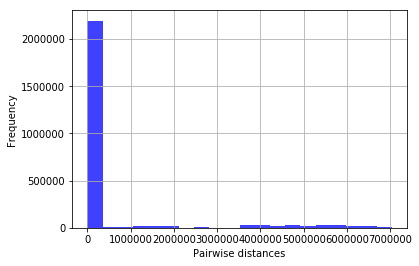

In [16]:
#Visualize pairwise distances 
D = pairwise_distances(M, metric = 'euclidean')
plt.hist(np.hstack(D), 20, facecolor='blue', alpha=0.75)
plt.xlabel('Pairwise distances')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
#it appears that the highest frequency is around 0. This makes intuitive sense because there are some non-responses for the physio data as would be expected - there is not always a physiological response. 

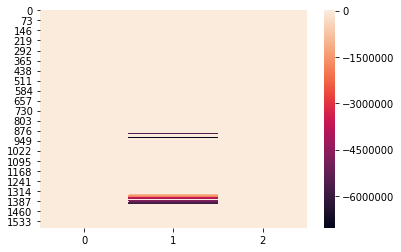

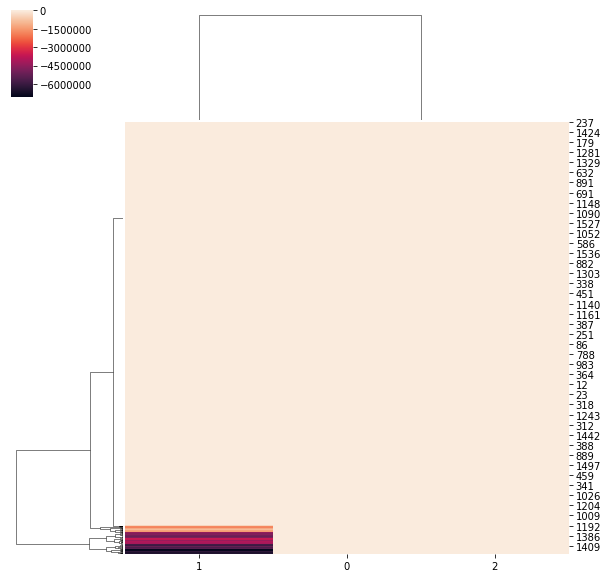

In [17]:
# Observe potential patterns in the data 
import seaborn as sns
sns.heatmap(M)
plt.show()
sns.clustermap(M)
plt.show()
#no patterns jump out, especially because reaction time values are being grouped by exact values rather than estimates 

# Clean data set / make different data sets for different tests 

In [27]:
#reformat dataframe for specific tests that I want to run 
data_true_labels = data["Run"] 
data_without_labels = data.drop(columns = "Run")
data_crafted = data_without_labels.drop(columns = ["Subject", "Trial"])  #the number of the run is reletively arbitrary information, as the number of the run does not necessarily correspond to a specific condition, specific heat delivered, etc., 
data_crafted2 = data_without_labels.drop(columns = "Subject") #data frame that I can use if I want to drop subject information and keep trial information 
#make another data set which uses pain rating as labels 
data_crafted_withoutNan3 = data_crafted2[data_crafted2['Trial']> 0]
##
make_labels = data[data['Trial']> 0]
data_true_labels = make_labels["Run"]
##
data_crafted_withoutNan3 = data_crafted_withoutNan3.drop(columns = ["Trial"])
data_VAS_labels = data_crafted_withoutNan3["VAS"]
data_VAS_test = data_crafted_withoutNan3.drop(columns = "VAS")
#make another data set which uses heat as labels 
data_heat_labels = data_crafted_withoutNan3["Heat"] 
data_heat_test = data_crafted_withoutNan3.drop(columns = "Heat")
#Complete dataframe without NaNs and without subject/trial information 
data_clean = data_crafted_withoutNan3

# K-Means tests 

In [29]:
#use kmeans algorithm to divide sampels so that within-clusters sum of squares is minimized. Positions of centroids are reassigned until optimal solution is reached 
#Here, I am beginning by looking at the dataset as a whole. I will then proceed to look at what happens when I use the data set in which I left heat out as labels and the one where I left VAS our 
from sklearn.cluster import KMeans
from sklearn import metrics

model = KMeans(
    n_clusters=20,
    init='k-means++', # default 
    n_init=10, # default
    max_iter=300, # default
    tol=1e-4, # default
    random_state=123124,
)
model.fit(data_clean)
cluster_labels = model.fit_predict(data_clean)
metrics.adjusted_rand_score(data_true_labels, cluster_labels) #test the similarity between the two assignments 
print(cluster_labels)
#adjusted rand score is slightly positive, but essentially 0, meaning that the similarity is essentially random
#this is what I would predict, as we are using the whole data set 

0.00022392737143579888

In [30]:
#now, use dataset where I left the heat out as labels 
from sklearn.cluster import KMeans

model = KMeans(
    n_clusters=3, 
    init='k-means++', 
    n_init=10, # default, also: 5, 1
    max_iter=300, # default
    tol=1e-4, # default
    random_state=123124,
)
model.fit(data_heat_test)
cluster_labels = model.fit_predict(data_heat_test)
metrics.adjusted_rand_score(data_heat_labels, cluster_labels) #test similarity between the two assignments
print(cluster_labels)
#this is slightly more positive, but still essentially random 

0.0008771209392093171

In [31]:
#create function which plots k means in order to visualize the data 
def plot_kmeans(original_data, cluster_labels, model, k):
    """Plot the clusters and centroids for a model trained on the Iris dataset."""
    # Scatter plots of each species
    for cluster_idx in range(k):
        plt.scatter(
            original_data.iloc[cluster_labels == cluster_idx, 0],
            original_data.iloc[cluster_labels == cluster_idx, 1],
            label="Cluster #{}".format(cluster_idx),
        )
    plt.legend()
    #plt.scatter(original_data[cluster_labels == 1, 0], original_data[cluster_labels == 1, 1], s = 100, c = 'blue', label = 'Species 1')

    # Add centroids to plot
    plt.scatter(
        model.cluster_centers_[:, 0],
        model.cluster_centers_[:, 1],
        s=100,
        c='red',
    )

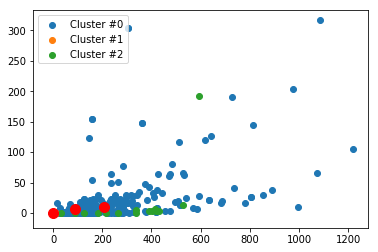

In [32]:
#Visualize results from k means which we just computed 
plot_kmeans(data_heat_test, cluster_labels, model, 3)

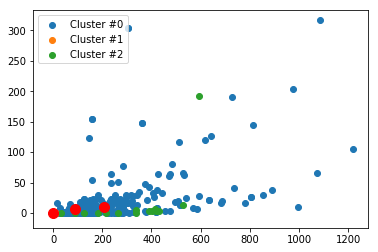

In [145]:
#now use the data set with VAS left out as labels 
model = KMeans(
    n_clusters= 3,
    init="k-means++", 
    n_init=100, 
    max_iter=100, 
)
model.fit(data_VAS_test)
cluster_labels = model.predict(data_VAS_test)
plot_kmeans(data_VAS_test, cluster_labels, model, 3)
#this looks about the same as the last plot 

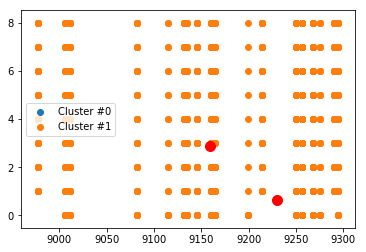

In [110]:
#Let's try the same thing, but keeping trial and subject information 

model = KMeans(
    n_clusters=3,
    init="random", 
    n_init=10, 
    max_iter=100, 
)
model.fit(data_without_labels)
cluster_labels = model.predict(data_without_labels)
plot_kmeans(data_without_labels, cluster_labels, model, 2)
#as expected, subject and trial information occlude other information when you leave them in.

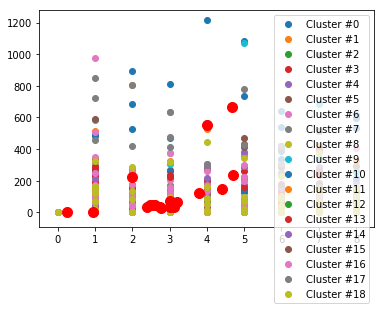

In [116]:
#let's try the same thing without subject information to see what happens - I am putting 19 clusters to see what happens, because there were 19 subjects. With most of these analyses, I experimented with various cluster numbers; however, I am only including a few for brevity. 
data_without_trial_info = data_without_labels.drop(columns = ["Subject"])
model = KMeans(
    n_clusters= 19,
    init="random", 
    n_init=10, 
    max_iter=100, 
)
model.fit(data_without_trial_info)
cluster_labels = model.predict(data_without_trial_info)
plot_kmeans(data_without_trial_info, cluster_labels, model, 19)
#it appears that the clusters are spread more or less by subject if you divide by trial and collapse by subject, as you might expect 

# Expanding on model evaluation 

In [34]:
#We already evaluated the fit of our earlier models, let's try different ways of evaluating and let's also look at runs
#as a reminder, sorting by runs should be more arbitrary
from sklearn import metrics
model = KMeans(n_clusters= 3)  
model.fit(data_clean) 
cluster_labels = model.predict(data_clean)
metrics.adjusted_rand_score(data_true_labels, cluster_labels)
#and indeed, sorting by runs is independent, whereas earlier tests revealed slight positivity

0.0003363122358400617

In [35]:
#Let's see if this changes when we drop placebo and cue information, as applied to using heat as labels 
data_heat_test_without_cue_cream = data_heat_test.drop(columns = ["LoworHighCue", "Cream"])

In [36]:
#how good was the fit? 0 being random, <0 being independent, >0 being related  
from sklearn import metrics
model = KMeans(n_clusters= 3)  
model.fit(data_heat_test_without_cue_cream) #data without labels/without VAS 
cluster_labels = model.predict(data_heat_test_without_cue_cream)
metrics.adjusted_rand_score(data_heat_labels, cluster_labels) #compare cluster labels to true labels 
#we get essentially the same result when we run the same test without 

0.0008771209392093171

In [153]:
#Let's see if this changes when we drop placebo and cue information, as applied to using VAS as labels 
data_VAS_test_without_cue_cream = data_VAS_test.drop(columns = ["LoworHighCue", "Cream"])

In [155]:
#how good was the fit? 0 being random, <0 being independent, >0 being related  
model = KMeans(n_clusters= 3)  
model.fit(data_VAS_test_without_cue_cream) #data without labels/without VAS 
cluster_labels = model.predict(data_VAS_test_without_cue_cream)
metrics.adjusted_rand_score(data_VAS_labels, cluster_labels) #compare cluster labels to true labels 
#adjusted rand score reveals that fit is essentially random 

0.00031055827398909395

In [160]:
#now try with adjusted mutual info score for VAS 
model = KMeans(n_clusters= 3)  
model.fit(data_VAS_test_without_cue_cream) #data without labels/without VAS 
cluster_labels = model.predict(data_VAS_test_without_cue_cream)
metrics.adjusted_mutual_info_score(data_VAS_labels, cluster_labels, average_method='arithmetic')
#becomes slightly more positive when we use adjusted mutual info score 

0.03740488366584494

In [159]:
#now try with adjusted mutual info score for heat
model = KMeans(n_clusters= 3)  
model.fit(data_heat_test_without_cue_cream) #data without labels/without VAS 
cluster_labels = model.predict(data_heat_test_without_cue_cream)
metrics.adjusted_mutual_info_score(data_heat_labels, cluster_labels, average_method='arithmetic')
#adjusted mutual info score is slightly mroe negative 

-0.0006724705466737211

In [161]:
# homogeneity: each cluster contains only members of a single class.
# completeness: all members of a given class are assigned to the same cluster.
# 0 to 1:  bad to perfect
np.round(
    metrics.homogeneity_completeness_v_measure(data_VAS_labels, cluster_labels),
    3)
#two clusters appears to be very incomplete, and one more complete

array([0.032, 0.751, 0.061])

# Figure out what best estimate of clusters might be using an elbow plot 

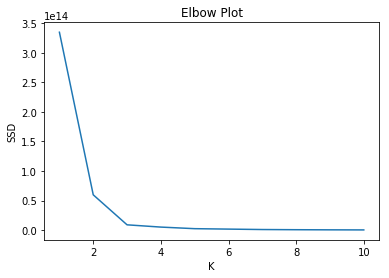

In [170]:
#What might be the best estimate of number of clusters? 
def plot_elbow(dataset, max_clusters):
    """Plot elbow curve for k-means."""
    inertias = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=768797)
        kmeans.fit(dataset)
        inertias.append(kmeans.inertia_)

    plt.plot(range(1, max_clusters + 1), inertias)
    plt.title("Elbow Plot")
    plt.xlabel("K")
    plt.ylabel("SSD")

plot_elbow(data_clean, 10)

# Elbow plot converges on 3 clusters. This intuitively seems to make the most sense - could this correspond to our three heat conditions? Let's continue to explore the data 

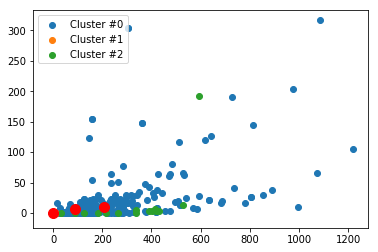

In [171]:
#what does a k-means plot look like with three clusters? 
model = KMeans(n_clusters=3)
cluster_labels = model.fit_predict(data_clean)
plot_kmeans(data_clean, cluster_labels, model, 3)

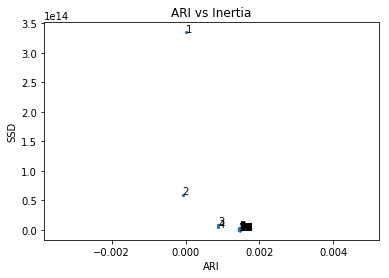

In [173]:
#let's look at sum of square differences as a funciton of adjusted rand index 
inertias = []
ARIs = []
Ks = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, random_state=768797)
    kmeans.fit(data_heat_test)
    labels = kmeans.predict(data_heat_test)
    inertias.append(kmeans.inertia_)
    ARIs.append(metrics.adjusted_rand_score(data_heat_labels, labels))
    Ks.append(str(i))

fig, ax = plt.subplots()
ax.scatter(ARIs, inertias, s=5)
plt.title("ARI vs Inertia")
plt.xlabel("ARI")
plt.ylabel("SSD")

for i, txt in enumerate(Ks):
    ax.annotate(txt, (ARIs[i], inertias[i]))

# Visually, these clusters don't seem particularly compelling or robust. So, what do the numbers say? 

In [190]:
#Cluster the dataset using K-means and evaluate using adjusted rand index (ARI)
from sklearn.metrics import adjusted_rand_score
kmeans2 = KMeans(n_clusters=10, random_state=126)
model = kmeans2.fit(data_heat_test)
labels_pred =(model.predict(data_heat_test))
score = adjusted_rand_score(data_heat_labels, labels_pred)
print(score)
#still, not particularly compelling

0.001440839958231272


In [174]:
# Showing silhouette coefficient for each sample
# A higher Silhouette Coefficient score relates to a model with better defined clusters. 

from sklearn.metrics.cluster import silhouette_samples
from sklearn.metrics.cluster import silhouette_score

def plot_silhouette_diagnostics(n_clusters):
    # Compute the silhouette scores for each sample
    kmeans = KMeans(n_clusters=n_clusters).fit(X)
    lbls = kmeans.labels_
    values = silhouette_samples(X, lbls)

    g, ax = plt.subplots(figsize=(8, 6))
    color_scale = np.linspace(0, 1, n_clusters)
    y_lower = 1
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i
        v = sorted(values[lbls == i])
        cluster_size = len(v)
        y_upper = y_lower + cluster_size

        # color mapping:
        c = plt.cm.Set1(color_scale[i])
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, v, facecolor=c, edgecolor=c, alpha=0.8)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * cluster_size, str(i))
        y_lower = y_upper + 1

    ax.set_xlabel("Silhouette coefficient")
    ax.set_ylabel("Cluster label")

    # Red dashed line shows an average silhouette score across all samples in all clusters
    score = silhouette_score(X, lbls, metric='l2')
    ax.axvline(x=score, color="red", linestyle="--")
    ax.set_yticks([])
    plt.show()

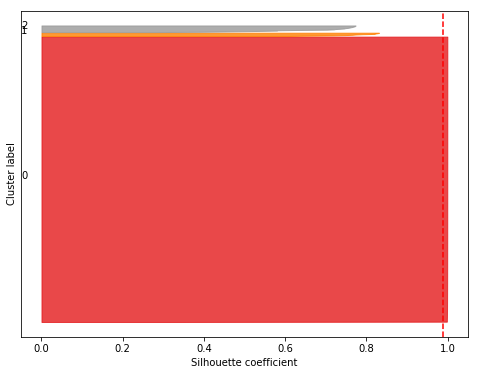

In [177]:
X = data_clean
lbls = data_heat_labels
plot_silhouette_diagnostics(3)

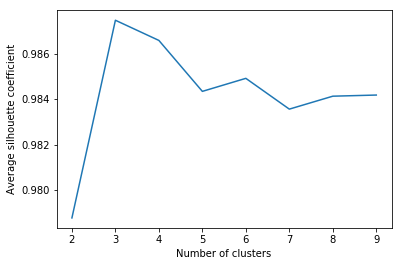

In [178]:
# Let's use the silhouette score itself to 

def calc_silhouette(dataset, n):
    """Runs Kmeans clustering and returns average silhouette coefficient"""    
    kmeans = KMeans(n_clusters=n).fit(dataset)
    score = silhouette_score(dataset, kmeans.labels_)
    return score

scores = {n: calc_silhouette(data_clean, n) for n in range(2, 10)}
# pprint.pprint(scores)
plt.plot(
    list(scores.keys()),
    list(scores.values())
)

plt.xlabel("Number of clusters")
plt.ylabel("Average silhouette coefficient")
plt.show()

## Plot AIC and BIC
Let's plot the AIC and BIC to determine whether we chose the right number of clusters.

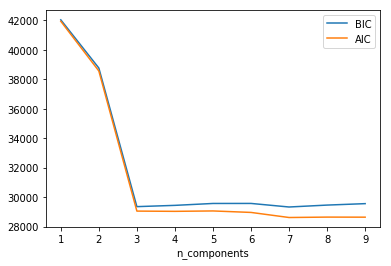

In [64]:
n_components = np.arange(1, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X)
          for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

#  Plotting AIC and BIC reveals the same 3 clusters  

# As expected, we don't gain much useful information using unsupervised methods, given the complexity of the data and the nature of the experimental design. Let's move to supervised learning models, as these better suit the questions we have posed 

In [194]:
#Reminder: What does our data look like? 
print(data_clean.head)#data clean has no subj or trial info 
#low or high refers to cue - see methods explanation 
#heat refers to level of heat administered - 2, 5, or 8 
#RT refers to reaction time 
#0 means no heat, 1 means low heat, 2 means high heat, 1 means control
#cream, 2 means placebo cream, 0 means no cream 

<bound method NDFrame.head of              AUC      AUCbc  curAMP    RT  VAS  Heat  LoworHighCue  Cream
0     316.764440  29.204585  1.2349  2778  7.6     8             2      0
1     238.219225  12.646175  0.8099  2648  7.1     8             2      0
2       0.000000   0.000000  0.0000  2390  1.3     2             1      0
3       0.000000   0.000000  0.0000  2775  1.4     2             1      0
4       0.000000   0.000000  0.0000  1847  6.3     8             2      0
5     126.640780   0.568350  0.0456  1839  5.2     8             2      0
6       0.000000   0.000000  0.0000  1741  2.0     2             1      0
7       0.000000   0.000000  0.0000  2713  1.5     2             1      0
8     272.341520  16.324045  0.9303  1831  8.0     8             2      0
9      51.371282   0.008293  0.0026  1355  6.6     8             2      0
10      0.000000   0.000000  0.0000  1774  2.3     5             1      0
11      0.000000   0.000000  0.0000  1315  4.2     5             2      0
12      

# First, let's try regression problems using VAS score as labels (continuous). Before going forward, let's pick a measure of SCR to utilize, as using all three would be redundant. Does AUC, AUCbc, or curAMP perform best? 

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#remove AUC and curAMP info isolate AUCbc as metric, sort into placebo condition vs. control,
data_AUCbc_predict_VAS = data_clean[data_clean["Cream"]<1] #train on runs w/o placebo cream 
X = data_AUCbc_predict_VAS[["AUCbc", "RT", "Heat"]]#can we see anything with RT, physio, and heat level alone?  
y = data_AUCbc_predict_VAS.VAS
#init
lr = LinearRegression()
#learning
lr.fit(X, y)
y_preds = lr.predict(X)
#learned model w & b: 
lr.coef_, lr.intercept_
# R^2 - coefficient of determination or proportion of explained variance
lr.score(X, y)
# "predictions" based on the training dataset
y_model = lr.predict(X)
print(lr.score(X, y))
mean_squared_error(y, y_model)


0.7143749314904339


2.0558481052814495

In [214]:
#remove AUCbc and curAMP info isolate AUC as metric, sort into placebo condition vs. control,
data_AUC_predict_VAS = data_clean[data_clean["Cream"]<1] #train on runs w/o placebo cream 
X = data_AUC_predict_VAS[["AUC", "RT", "Heat"]]#can we see anything with RT, physio, and heat level alone?  
y = data_AUC_predict_VAS.VAS
#init
lr = LinearRegression()
#learning
lr.fit(X, y)
y_preds = lr.predict(X)
#learned model w & b: 
lr.coef_, lr.intercept_
# R^2 - coefficient of determination or proportion of explained variance
lr.score(X, y)
# "predictions" based on the training dataset
y_model = lr.predict(X)
print(lr.score(X, y))
mean_squared_error(y, y_model)

0.714456778945156


2.055258990552862

In [243]:
from sklearn.linear_model import LinearRegression
#remove AUCbc and AUC info isolate curamp as metric, sort into placebo condition vs. control,
data_curAMP_predict_VAS = data_clean[data_clean["Cream"]<1] #train on runs w/o placebo cream 
X = data_curAMP_predict_VAS[["curAMP", "RT", "Heat"]]#can we see anything with RT, physio, and heat level alone?  
y = data_curAMP_predict_VAS.VAS
#init
lr = LinearRegression()
#learning
lr.fit(X, y)
y_preds = lr.predict(X)
#learned model w & b: 
lr.coef_, lr.intercept_
# R^2 - coefficient of determination or proportion of explained variance
lr.score(X, y)
# "predictions" based on the training dataset
y_model = lr.predict(X)
print(lr.score(X, y))
mean_squared_error(y, y_model)
#best model performance

0.7168437773185401


2.0380780543386896

# Okay, so curAMP performed best of the SCR measures, although all three performed similarly (again, these measures are on some level redundant and are just different ways of computing the same thing, so we did expect similar performace). Going forward, I will just use curAMP as the SCR measure. 

# Let's ask: how well does a model trained on physio and reaction time (with level of heat delivered accounted for) perform on hold out data? First, I will test baseline trials (trials without placebo or control cream used) 

In [268]:
#remove AUCbc and AUC info isolate curamp as metric 
#first testing on runs without placebo cream 
data_curAMP_predict_VAS = data_clean[data_clean["Cream"]<1] #train on runs w/o placebo cream 
X = data_curAMP_predict_VAS[["curAMP", "RT", "Heat"]]#can we see anything with RT, physio, and heat level alone?  
y = data_curAMP_predict_VAS.VAS
#init
lr = LinearRegression()
#learning
lr.fit(X, y)
y_preds = lr.predict(X)
#learned model w & b: 
lr.coef_, lr.intercept_
# R^2 - coefficient of determination or proportion of explained variance
lr.score(X, y)
# "predictions" based on the training dataset
y_model = lr.predict(X)
#print(lr.score(X, y))
mean_squared_error(y, y_model)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# Linear Regression
predicted = LinearRegression().fit(X_train, y_train).predict(X_test)
print(lr.score(X_test,y_test))
mean_squared_error(y_test, predicted)
#Low mean squared error 


0.6927448314117894


2.107505457349113

# We see that this model which excludes placebo trials does perform well on holdout data. But how does this perform on placebo? We hypothesized that a model trained on baseline trials would not perform as well on trials with placebo cream 

In [39]:
from sklearn.linear_model import LinearRegression
#remove AUCbc and AUC info isolate curamp as metric, sort into placebo condition vs. control,
data_curAMP_predict_VAS = data_clean[data_clean["Cream"]>1] #train on runs w/o placebo cream 
X = data_curAMP_predict_VAS[["curAMP", "RT", "Heat"]]#can we see anything with RT, physio, and heat level alone?  
y = data_curAMP_predict_VAS.VAS
#init
lr = LinearRegression()
#learning
lr.fit(X, y)
y_preds = lr.predict(X)
#learned model w & b: 
lr.coef_, lr.intercept_
# R^2 - coefficient of determination or proportion of explained variance
lr.score(X, y)
# "predictions" based on the training dataset
y_model = lr.predict(X)
print(lr.score(X, y))
mean_squared_error(y, y_model)
#best model performance

0.47568804289209043


3.0857252703971474

# As hypothesized, model performance is significantly worse on placebo trials. Let's try this using Lasso  

In [272]:
#let's try this using Lasso Regression 
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
data_curAMP_predict_VAS = data_clean[data_clean["Cream"]<1] #train on runs w/o placebo cream 
X = data_curAMP_predict_VAS[["curAMP", "RT", "Heat"]]#can we see anything with RT, physio, and heat level alone?  
y = data_curAMP_predict_VAS.VAS
#init
llr = Lasso(alpha=0.5)
llr.fit(X, y)
preds = llr.predict(X)

# Create the CV iterator
cv_iterator = KFold(n_splits=5, shuffle=True, random_state=10)

#get MS error cross_val_score(llr, X, y, cv=cv_iterator, scoring="neg_mean_squared_error")
cross_val_score(llr, X, y, cv=5, scoring="neg_mean_squared_error")
abs(np.mean(cross_val_score(llr, X, y, cv=5, scoring="neg_mean_squared_error")))

2.3027006907791323

# Similar results are observed with the Lasso method. Now let's try Lasso with placebo. 

In [271]:
#now try Lasso Regression with placebo 
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
data_curAMP_predict_VAS = data_clean[data_clean["Cream"]<2] #train on runs w/o placebo cream 
X = data_curAMP_predict_VAS[["curAMP", "RT", "Heat"]]#can we see anything with RT, physio, and heat level alone?  
y = data_curAMP_predict_VAS.VAS
data_curAMP_predict_VAS_placebo = data_clean[data_clean["Cream"]==2]
X_new = data_curAMP_predict_VAS_placebo[["curAMP", "RT", "Heat"]]
y_new = data_curAMP_predict_VAS_placebo.VAS 
llr = Lasso(alpha=0.5)
llr.fit(X_new, y_new)
preds = llr.predict(X_new)

# Create the CV iterator
cv_iterator = KFold(n_splits=5, shuffle=True, random_state=10)

#get MS error 
cross_val_score(llr, X, y, cv=cv_iterator, scoring="neg_mean_squared_error")
cross_val_score(llr, X, y, cv=5, scoring="neg_mean_squared_error")
abs(np.mean(cross_val_score(llr, X, y, cv=5, scoring="neg_mean_squared_error")))

3.8726636142852535

# Again, similar results as with linear regression. Now let's visualize the data 

In [14]:
#now let's plot learning curves 
#From http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

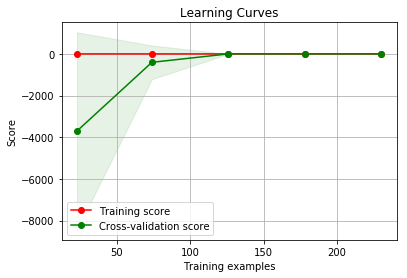

In [275]:
#plot learning curve for non-placebo
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
title = "Learning Curves"

# Create the CV iterator
cv_iterator = KFold(n_splits=5, shuffle=True, random_state=10)
llr = Lasso(alpha=0.5)

plot_learning_curve(llr, title, X, y, cv=cv_iterator, n_jobs=4)

plt.show()

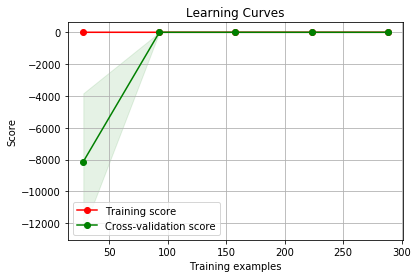

In [276]:
#plot learning curve for placebo
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
title = "Learning Curves"

# Create the CV iterator
cv_iterator = KFold(n_splits=5, shuffle=True, random_state=10)
llr = Lasso(alpha=0.5)

plot_learning_curve(llr, title, X_new, y_new, cv=cv_iterator, n_jobs=4)

plt.show()

# Let's play around and see what happens when we include the control condition (the cream condition) in the model, and if the model performs any differently when we exclude different pieces of info 

In [212]:
#do the same thing, but include control condition in the model  
#remove AUCbc and AUC info isolate curamp as metric, sort into placebo condition vs. control,
data_curAMP_predict_VAS = data_clean[data_clean["Cream"]<2] #train on runs w/o placebo cream 
X = data_curAMP_predict_VAS[["curAMP", "RT", "Heat"]]#can we see anything with RT, physio, and heat level alone?  
y = data_curAMP_predict_VAS.VAS
#init
lr = LinearRegression()
#learning
lr.fit(X, y)
y_preds = lr.predict(X)
#learned model w & b: 
lr.coef_, lr.intercept_
# R^2 - coefficient of determination or proportion of explained variance
lr.score(X, y)
# "predictions" based on the training dataset
y_model = lr.predict(X)
print(lr.score(X, y))
mean_squared_error(y, y_model)


0.48944902226954234


3.4171060793557384

In [216]:
#does model perform better without phys info? 
#remove AUCbc and AUC info isolate curamp as metric, sort into placebo condition vs. control,
data_curAMP_predict_VAS = data_clean[data_clean["Cream"]<1] #train on runs w/o placebo cream 
X = data_curAMP_predict_VAS[["RT", "Heat"]]#can we see anything with RT and heat level alone?  
y = data_curAMP_predict_VAS.VAS
#init
lr = LinearRegression()
#learning
lr.fit(X, y)
y_preds = lr.predict(X)
#learned model w & b: 
lr.coef_, lr.intercept_
# R^2 - coefficient of determination or proportion of explained variance
lr.score(X, y)
# "predictions" based on the training dataset
y_model = lr.predict(X)
print(lr.score(X, y))
mean_squared_error(y, y_model)

0.7142131649733149


2.057012454718466

In [217]:
#with heat info alone? 
from sklearn.linear_model import LinearRegression
#remove AUCbc and AUC info isolate curamp as metric, sort into placebo condition vs. control,
data_curAMP_predict_VAS = data_clean[data_clean["Cream"]<1] #train on runs w/o placebo cream 
X = data_curAMP_predict_VAS[["Heat"]]
y = data_curAMP_predict_VAS.VAS
#init
lr = LinearRegression()
#learning
lr.fit(X, y)
y_preds = lr.predict(X)
#learned model w & b: 
lr.coef_, lr.intercept_
# R^2 - coefficient of determination or proportion of explained variance
lr.score(X, y)
# "predictions" based on the training dataset
y_model = lr.predict(X)
print(lr.score(X, y))
mean_squared_error(y, y_model)


0.5603334157604165


3.164595176750886

In [208]:
#how does it perform on placebo? 
#remove AUCbc and AUC info isolate curamp as metric, sort into placebo condition vs. control,
data_curAMP_predict_VAS = data_clean[data_clean["Cream"]<2] #train on runs w/o placebo cream 
X = data_curAMP_predict_VAS[["curAMP", "RT", "Heat"]]#can we see anything with RT, physio, and heat level alone?  
y = data_curAMP_predict_VAS.VAS
#init
lr = LinearRegression()
#learning
lr.fit(X, y)
y_preds = lr.predict(X)
#learned model w & b: 
lr.coef_, lr.intercept_
# R^2 - coefficient of determination or proportion of explained variance
lr.score(X, y)
# "predictions" based on the training dataset
y_model = lr.predict(X)
mean_squared_error(y, y_model)
data_curAMP_predict_VAS_placebo = data_clean[data_clean["Cream"]==2]
X_new = data_curAMP_predict_VAS_placebo[["curAMP", "RT", "Heat"]]
y_new = data_curAMP_predict_VAS_placebo.VAS 
lr.fit(X_new, y_new)
lr.coef_, lr.intercept_
print(lr.score(X_new, y_new))
y_model = lr.predict(X_new)
mean_squared_error(y_new, y_model)

0.47568804289209043


3.0857252703971474

In [282]:
#how does it perform on placebo? -> implement train/test
#remove AUCbc and AUC info isolate curamp as metric, sort into placebo condition vs. control,
data_curAMP_predict_VAS = data_clean[data_clean["Cream"]<1] #train on runs w/o placebo cream 
X = data_curAMP_predict_VAS[["Heat"]]#can we see anything with RT, physio, and heat level alone?  
y = data_curAMP_predict_VAS.VAS
#init
lr = LinearRegression()
#learning
lr.fit(X, y)
y_preds = lr.predict(X)
#learned model w & b: 
lr.coef_, lr.intercept_
# R^2 - coefficient of determination or proportion of explained variance
lr.score(X, y)
# "predictions" based on the training dataset
y_model = lr.predict(X)
mean_squared_error(y, y_model)
#train/test split to validate 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# Linear Regression
predicted = LinearRegression().fit(X_train, y_train).predict(X_test)
print(lr.score(X_test,y_test))
mean_squared_error(y_test, predicted)


0.5346024649149181


3.1673817731813494

In [209]:
lr.predict(X_new)

array([ 5.97002032,  1.54823045,  3.76057491,  5.97058259,  1.54813733,
        3.75907706,  3.75907918,  3.75945943,  5.97042809,  3.75880686,
        1.54822199,  3.75955256,  5.97070887,  3.76057492,  3.75942275,
        1.54929439,  6.01399146,  1.54885622,  1.54881812,  3.7594418 ,
        3.75959841,  3.75934162,  5.97062774,  3.75955961,  1.5533824 ,
        1.54839695,  3.75919558,  3.75917089,  3.75992717,  3.75941781,
        5.97085068,  5.97091135,  5.97074415,  5.97159566,  3.75905308,
        1.54798283,  3.75897265,  0.34400523,  3.75936984,  1.56367821,
        1.55617498,  3.75940511,  1.54933665,  5.970493  ,  3.75849857,
        3.76128875,  5.97226728,  3.76135718,  1.54945654,  3.75960335,
        1.549603  ,  5.97146515,  3.76027356,  3.75943968,  5.97173535,
        3.76061401,  5.97133115,  3.7598008 ,  1.54838637,  3.75974586,
        3.75923136,  1.54933323,  5.97119777,  3.7593397 ,  1.54764138,
        3.75964427,  1.54883011,  5.97143277,  3.75898323,  3.76

0.7168437773185401


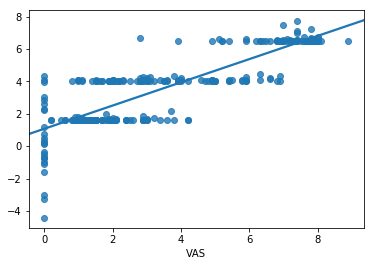

In [41]:
#What does this look like in best plot? 
#remove AUCbc and AUC info isolate curamp as metric, sort into placebo condition vs. control,
data_curAMP_predict_VAS = data_clean[data_clean["Cream"]<1] #train on runs w/o placebo cream 
X = data_curAMP_predict_VAS[["curAMP", "RT", "Heat"]]#can we see anything with RT, physio, and heat level alone?  
y = data_curAMP_predict_VAS.VAS
#init
lr = LinearRegression()
#learning
lr.fit(X, y)
y_preds = lr.predict(X)
#learned model w & b: 
lr.coef_, lr.intercept_
# R^2 - coefficient of determination or proportion of explained variance
lr.score(X, y)
# "predictions" based on the training dataset
y_model = lr.predict(X)
print(lr.score(X, y))
mean_squared_error(y, y_model)

sns.regplot(data_curAMP_predict_VAS.VAS, y_model, data=data_clean, ci=None)

0.47568804289209043


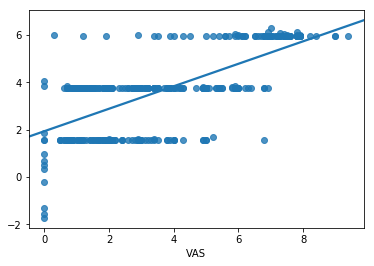

In [42]:
#What does this look like in placebo? 
#remove AUCbc and AUC info isolate curamp as metric, sort into placebo condition vs. control,
data_curAMP_predict_VAS = data_clean[data_clean["Cream"]==2] #train on runs w/o placebo cream 
X = data_curAMP_predict_VAS[["curAMP", "RT", "Heat"]]#can we see anything with RT, physio, and heat level alone?  
y = data_curAMP_predict_VAS.VAS
#init
lr = LinearRegression()
#learning
lr.fit(X, y)
y_preds = lr.predict(X)
#learned model w & b: 
lr.coef_, lr.intercept_
# R^2 - coefficient of determination or proportion of explained variance
lr.score(X, y)
# "predictions" based on the training dataset
y_model = lr.predict(X)
mean_squared_error(y, y_model)
data_curAMP_predict_VAS_placebo = data_clean[data_clean["Cream"]==2]
X_new = data_curAMP_predict_VAS_placebo[["curAMP", "RT", "Heat"]]
y_new = data_curAMP_predict_VAS_placebo.VAS 
lr.fit(X_new, y_new)
lr.coef_, lr.intercept_
print(lr.score(X_new, y_new))
y_model = lr.predict(X_new)
mean_squared_error(y_new, y_model)
sns.regplot(data_curAMP_predict_VAS.VAS, y_model, data=data_clean, ci=None)

# Could these potentially correspond to our initial 3 clusters? 

0.5314919992191051


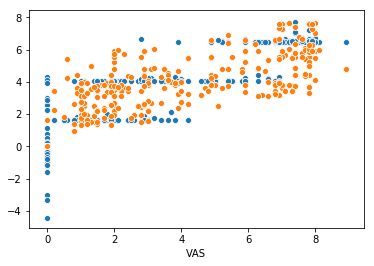

In [43]:
#try k neighbors regression 
from sklearn.neighbors import KNeighborsRegressor
data_curAMP_predict_VAS = data_clean[data_clean["Cream"]<1] #train on runs w/o placebo cream 
X = data_curAMP_predict_VAS[["curAMP", "RT", "Heat"]]
y = data_curAMP_predict_VAS.VAS
#reminder
#init
lr = LinearRegression()
lr.fit(X, y)
y_preds = lr.predict(X)
lr.score(X, y)
y_model = lr.predict(X)
#init K Neighbors
nnr = KNeighborsRegressor(n_neighbors=3)
nnr.fit(X, y)
y_pred_nn = nnr.predict(X)
nnr.score(X, y)
# "predictions" based on the training dataset
print(nnr.score(X, y))
sns.scatterplot(data_curAMP_predict_VAS.VAS, y_model)
sns.scatterplot(data_curAMP_predict_VAS.VAS, y_pred_nn)
y_preds = nnr.predict(X_new)



0.413459576795397


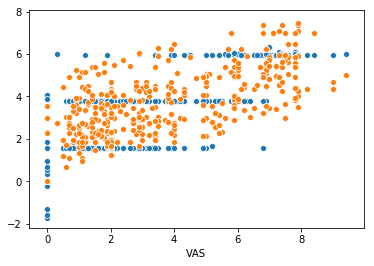

In [44]:
#try k nearest neighbors in placebo
data_curAMP_predict_VAS = data_clean[data_clean["Cream"]==2] #train on runs w/o placebo cream 
X = data_curAMP_predict_VAS[["curAMP", "RT", "Heat"]]#can we see anything with RT, physio, and heat level alone?  
y = data_curAMP_predict_VAS.VAS
#init
lr = LinearRegression()
#learning
lr.fit(X, y)
y_preds = lr.predict(X)
#learned model w & b: 
lr.coef_, lr.intercept_
# R^2 - coefficient of determination or proportion of explained variance
lr.score(X, y)
# "predictions" based on the training dataset
y_model = lr.predict(X)
mean_squared_error(y, y_model)
data_curAMP_predict_VAS_placebo = data_clean[data_clean["Cream"]==2]
X_new = data_curAMP_predict_VAS_placebo[["curAMP", "RT", "Heat"]]
y_new = data_curAMP_predict_VAS_placebo.VAS 
lr.fit(X_new, y_new)
#init K Neighbors
nnr = KNeighborsRegressor(n_neighbors=3)
nnr.fit(X_new, y_new)
y_pred_nn = nnr.predict(X_new)
nnr.score(X_new, y_new)
# "predictions" based on the training dataset
print(nnr.score(X_new, y_new))
sns.scatterplot(data_curAMP_predict_VAS.VAS, y_model)
sns.scatterplot(data_curAMP_predict_VAS.VAS, y_pred_nn)


# As we can see, there appears to be greater variability when accounting for placebo, and predicted levels have shifted - this could be explained by decreased verbal ratings of heat in a placebo condition. Let's try random forest 

In [45]:
#try random forest regression on no cream 
from sklearn.ensemble import RandomForestRegressor
data_curAMP_predict_VAS = data_clean[data_clean["Cream"]<1] #train on runs w/o placebo cream 
X = data_curAMP_predict_VAS[["curAMP", "RT", "Heat"]]#can we see anything with RT, physio, and heat level alone?  
y = data_curAMP_predict_VAS.VAS
#init
lr = LinearRegression()
#learning
lr.fit(X, y)
y_preds = lr.predict(X)
#learned model w & b: 
lr.coef_, lr.intercept_
# R^2 - coefficient of determination or proportion of explained variance
lr.score(X, y)
# "predictions" based on the training dataset
y_model = lr.predict(X)
print(lr.score(X, y))
mean_squared_error(y, y_model)
np.random.seed(42) 
rf = RandomForestRegressor(n_estimators=10) #number of trees in the forest 
rf.fit(X, y)
y_preds = rf.predict(X)
rf.score(X, y)
y_pred_new = rf.predict(X_new)
print(rf.score(X, y))
estimator = rf.estimators_[5]

0.7168437773185401
0.9522030139159928


In [264]:
#try random forest regression on placebo 
from sklearn.ensemble import RandomForestRegressor
data_curAMP_predict_VAS = data_clean[data_clean["Cream"]==2] #train on runs w/o placebo cream 
X = data_curAMP_predict_VAS[["curAMP", "RT", "Heat"]]#can we see anything with RT, physio, and heat level alone?  
y = data_curAMP_predict_VAS.VAS
#init
lr = LinearRegression()
#learning
lr.fit(X, y)
y_preds = lr.predict(X)
#learned model w & b: 
lr.coef_, lr.intercept_
# R^2 - coefficient of determination or proportion of explained variance
lr.score(X, y)
# "predictions" based on the training dataset
y_model = lr.predict(X)
mean_squared_error(y, y_model)
data_curAMP_predict_VAS_placebo = data_clean[data_clean["Cream"]==2]
X_new = data_curAMP_predict_VAS_placebo[["curAMP", "RT", "Heat"]]
y_new = data_curAMP_predict_VAS_placebo.VAS 
np.random.seed(42) 
rf = RandomForestRegressor(n_estimators=10) #number of trees in the forest 
rf.fit(X_new, y_new)
y_preds = rf.predict(X_new)
rf.score(X_new, y_new)
print(rf.score(X_new, y_new))
#print(mean_squared_error(X_new, y_new))
y_model = rf.predict(X_new)
print(mean_squared_error(y_new, y_model))

0.8734299834727022
0.7449006134195139


# Regression problems revealed that while models could predict pain ratings with some reliability, these models performed poorly on placebo and control conditions, and this held when using different types of models. Next, let's try some classification problems using a continuous outcome variable: type of condition (placebo, control, or baseline). Let's ask: using the other pieces of trial information we have available, can we predict whether a trial was a baseline, control, or placebo trial? 

In [49]:
#Can we predict whether a trial was baseline, control, or placebo? 
from sklearn.linear_model import LogisticRegression
X = data_clean[["curAMP", "RT", "Heat", "LoworHighCue", "VAS"]]
y = data_clean.Cream
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(X, y)
y_preds = lr.predict(X)
#learned model w & b: 
lr.coef_, lr.intercept_
# R^2 - coefficient of determination or proportion of explained variance
print(lr.score(X, y))

0.34521384928716903


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# Logistic regression doesn't seem to produce any compelling results - let's try k neighbors classifier 

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

X = data_clean[["curAMP", "RT", "Heat", "LoworHighCue", "VAS"]]
y = data_clean.Cream

clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X, y)
pred_y = clf.predict(X)
print(pred_y)
clf.score(X, y)
mean_squared_error(y, pred_y)

[0 0 0 0 0 0 1 1 0 2 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 2 0 2 0 2 2 0 2 2 2 2 2
 0 0 2 2 2 2 2 2 2 0 2 2 0 2 2 1 0 2 0 1 1 1 1 1 1 1 1 0 1 0 1 2 1 2 1 1 0
 1 1 2 0 0 1 1 0 0 2 1 2 0 2 2 2 0 1 0 1 0 0 1 0 1 1 2 1 1 2 0 0 0 0 1 2 1
 0 1 2 0 2 2 1 0 0 0 0 0 0 0 1 0 2 0 1 2 0 0 0 1 0 1 0 1 1 0 0 1 1 0 2 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 2 2 0 0 0 2 2 2 2 2 1 2 2 2 0 0 2 2 0 0 0 0 0 0 0
 2 2 0 2 2 2 2 2 2 0 2 1 0 2 2 1 1 1 1 0 2 1 0 1 2 1 1 1 0 1 1 0 0 0 2 1 0
 1 1 2 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 2 0 0 2 1 0 0
 2 1 1 1 2 1 0 1 1 1 1 1 0 2 2 2 2 1 2 1 2 2 2 0 0 0 2 0 0 2 2 0 2 2 0 1 2
 2 1 2 2 2 2 2 2 2 2 0 1 1 0 2 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 1 1 1 1 0 1 1 1 1 1 0 1 2 2 1 1 2 1 2 1 1 1 1 1 1 1 0 1 0 1 0 1 2 0
 0 0 2 2 2 2 2 2 2 2 2 0 1 2 0 2 0 0 0 0 0 0 2 2 0 0 0 2 2 1 0 0 0 2 1 2 2
 1 2 2 2 2 0 2 2 2 0 2 1 2 2 2 2 2 2 0 0 2 2 2 0 2 0 2 1 1 0 1 1 0 0 1 2 0
 0 2 2 2 0 1 2 2 2 0 0 2 1 1 2 0 0 0 2 2 0 1 2 2 0 2 2 2 2 2 1 1 1 1 1 1 0
 1 1 1 1 1 0 2 1 1 0 0 0 

0.7678207739307535

# K neighbors classifier seems more promising. Let's now try linear SVC 

In [305]:
#perform linear SVC to predict creams 
from sklearn import svm
X = data_clean[["curAMP", "RT", "Heat", "LoworHighCue", "VAS"]]
y = data_clean.Cream
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = svm.SVC(gamma='scale')
clf.fit(X, y)  
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
predicted = clf.fit(X_train, y_train).predict(X_test)
print(clf.score(X_test,y_test))
#does not perform well 

0.3723076923076923


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/amircm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.35424903718954376

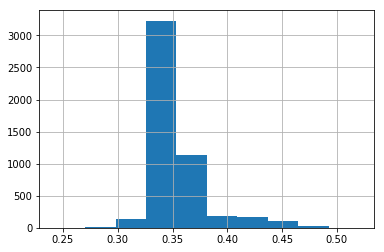

In [311]:
#trying simple logistic regression to predict categorical variable 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold, ShuffleSplit, cross_val_score
kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1000, random_state=42)
X = data_clean[["curAMP", "RT", "Heat", "LoworHighCue", "VAS"]]
y = data_clean.Cream
lr = LogisticRegression(solver = 'liblpd.Series(scores).mean()inear').fit(X, y) 
scores = cross_val_score(lr, X, y, cv = kf, scoring='accuracy', )
pass
pd.Series(scores).hist()

0.5594992548489462

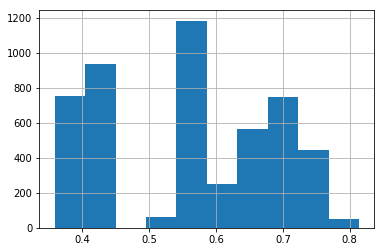

In [312]:
#what if we do this just using baseline vs. placebo? 
#trying simple logistic regression to predict categorical variable 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold, ShuffleSplit, cross_val_score
kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1000, random_state=42)
data_AUC_predict_Cream = data_clean[data_clean["Cream"]!=1] #exclude control runs 
X = data_AUC_predict_Cream[["curAMP", "RT", "Heat", "LoworHighCue", "VAS"]]
y = data_AUC_predict_Cream.Cream
lr = LogisticRegression(solver = 'liblinear').fit(X, y) 
scores = cross_val_score(lr, X, y, cv = kf, scoring='accuracy')
pass
pd.Series(scores).hist()
pd.Series(scores).mean()

0.5458688932890902

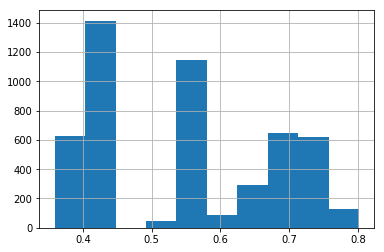

In [314]:
#what if we do this just using baseline vs. placebo? 
#trying simple logistic regression to predict categorical variable 
#take out diff pieces of info 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold, ShuffleSplit, cross_val_score
kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1000, random_state=42)
data_AUC_predict_Cream = data_clean[data_clean["Cream"]!=1] #exclude control runs 
X = data_AUC_predict_Cream[["curAMP", "RT", "Heat", "LoworHighCue"]]
y = data_AUC_predict_Cream.Cream
lr = LogisticRegression(solver = 'liblinear').fit(X, y) 
scores = cross_val_score(lr, X, y, cv = kf, scoring='accuracy')
pass
pd.Series(scores).hist()
pd.Series(scores).mean()

0.4884362494600552

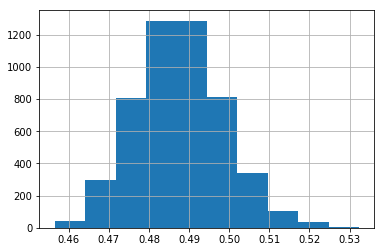

In [315]:
#what if we do this just using control and placebo? 
#trying simple logistic regression to predict categorical variable 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold, ShuffleSplit, cross_val_score
kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1000, random_state=42)
data_AUC_predict_Cream = data_clean[data_clean["Cream"]>0] #exclude baseline
X = data_AUC_predict_Cream[["curAMP", "RT", "Heat", "LoworHighCue", "VAS"]]
y = data_AUC_predict_Cream.Cream
lr = LogisticRegression(solver = 'liblinear').fit(X, y) 
scores = cross_val_score(lr, X, y, cv = kf, scoring='accuracy')
pass
pd.Series(scores).hist()
pd.Series(scores).mean()

0.570783323577224

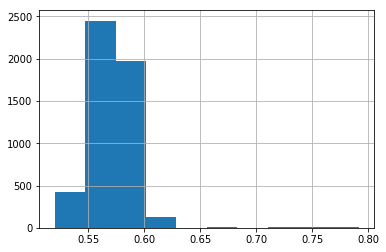

In [316]:
#what if we do this just using baseline and control? 
#trying simple logistic regression to predict categorical variable 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold, ShuffleSplit, cross_val_score
kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1000, random_state=42)
data_AUC_predict_Cream = data_clean[data_clean["Cream"]<2] #exclude placebo
X = data_AUC_predict_Cream[["curAMP", "RT", "Heat", "LoworHighCue", "VAS"]]
y = data_AUC_predict_Cream.Cream
lr = LogisticRegression(solver = 'liblinear').fit(X, y) 
scores = cross_val_score(lr, X, y, cv = kf, scoring='accuracy')
pass
pd.Series(scores).hist()
pd.Series(scores).mean()
#this performs the best of all of the comparisons...I don't know what to make of these results 

In [13]:
#perform linear SVC to predict creams 
from sklearn import svm
X = data_clean[["curAMP", "RT", "Heat", "VAS"]]
y = data_clean.Cream
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = svm.SVC(gamma='scale')
clf.fit(X, y)  
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
predicted = clf.fit(X_train, y_train).predict(X_test)
print(clf.score(X_test,y_test))
#does not perform well 

NameError: name 'SVC' is not defined

In [307]:
#perform linear SVC to predict creams 
from sklearn import svm
X = data_clean[["curAMP", "RT", "VAS"]]
y = data_clean.Cream
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = svm.SVC(gamma='scale')
clf.fit(X, y)  
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
predicted = clf.fit(X_train, y_train).predict(X_test)
print(clf.score(X_test,y_test))
#does not perform well 

0.3723076923076923


In [308]:
#perform linear SVC to predict creams 
from sklearn import svm
X = data_clean[[ "Heat", "LoworHighCue", "VAS"]]
y = data_clean.Cream
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)  
clf = svm.SVC(gamma='scale')
clf.fit(X, y)  
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
predicted = clf.fit(X_train, y_train).predict(X_test)
print(clf.score(X_test,y_test))
#performs better without physio info 

0.5015384615384615


In [319]:
#from sklearn.model_selection import train_test_split
#from sklearn import datasets
#from sklearn import svm
X = data_clean[["curAMP", "RT", "Heat", "LoworHighCue", "VAS"]]
y = data_clean.Cream
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)                           

0.4

In [ ]:
#trying SVC again but this time w/ baseline vs. control 
#from sklearn.model_selection import train_test_split
#from sklearn import datasets
#from sklearn import svm
data_AUC_predict_Cream = data_clean[data_clean["Cream"]<2] #exclude placebo
X = data_AUC_predict_Cream[["curAMP", "RT", "Heat", "LoworHighCue", "VAS"]]
y = data_AUC_predict_Cream.Cream
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)
#this is taking 5 billion years to run 

# Linear SVC does not seem to be particularly compelling. Perhaps k neighbors classifier was the best approach to this problem 

# In conclusion

What did we find when we addressed our aims? 
Aim 1: Try to model pain ratings using data from this study 
-> We saw that generally, models performed well when tested on hold-out data from the baseline da
Aim 2: Which physioligical measures is the best predictor of pain response? 
-> We found that curAMP was the best physiological measure and explained the most variability of the three different types of SCR analyses 
Aim 3: See if these regression models perform as well on the placebo condition as they do on baseline (non-control cream or placebo) conditions
-> As hypothesized, these models did not fit placebo conditions nearly as well as they fit holdout data from the baseline data set, even though all that has changed is presence or absence of placebo. This is in line with previous evidence that placebo alters the pain experience 
Aim 4: Use classification methods to see if we can build a model which reliably predicts whether a trial was a placebo, control, or baseline condition. 
-> While this was trickier and results were less consistent, we saw some success using the k neighbors classifier. 